# Classical Statistical Inference: Part 1

## Table of Content:

- I. [Basic probability concepts](#I)    
    * I.1 [Probability axioms](#I.1-Probability-axioms)
    * I.2 [What is a conditional probability and what is the Bayes theorem ?](#I.2-What-is-a-conditional-probability-and-what-is-the-Bayes-theorem-?)
    * I.3 [What is a random variable ?](#I.3-What-is-a-random-variable-?)
    * I.4 [What is a probability density function ?](#pdf)
    * I.4b [pdf, conditional probability and Bayes rule](#bayes)
    * I.5 [What is a cumulative density function ?](#I.5-What-is-a-cumulative-density-function-?)
    * I.6 [Working with pdf and CDF](#I.6-Working-with-pdf-and-CDF)

- X. [References and supplementary material](#X)

In [2]:
# Modules to be used in this notebook
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

## I Basic (probability) concepts:  <a class="anchor" id="I"></a>


### I.1 Probability axioms

First of all, let's remind us that in probability theory:
- the set of all possible outcomes of an experiment is generally called **sample space** and denoted, $\Omega$. 
- Points in $\Omega$, are called **realisations** (or sometimes also **sample outcomes**) $\omega$. 
- An **Event** is a subset of $\Omega$ (i.e. a subsample of the $\omega$).
- $p(A)$ is the **probability** of an event A. ($p(A)$ can also refer to a probability that a value of $x$ falls in a d$x$ wide interval around $x$. )

Example: We measure the magnitude *m* of a variable star. Then $\Omega = {\rm I\!R}$ (or some plausible range such as $]-30, 40 [ $, but this makes little difference in practice and $\Omega$ can in general be larger than needed). $\omega$ is a value in $\Omega$. While an event is the ensemble of magnitude measurements that are e.g. such that $m_i > 15$ and $m_i <=15.5$, hence this *event* is A = ]15, 15.5]. Note that an event *can* also be a single point (i.e. A = [17.]). 

To qualify as a probability, $p(A)$ must satisfy the three following axioms (also called [Kolmogorov](https://fr.wikipedia.org/wiki/Andre%C3%AF_Kolmogorov) axioms):
1. $p(A) > 0$ for each A. 
2. $p(\Omega) = 1$
3. If ($A_1, A_2, A_3, ...$ are disjoint events), then   
$$
p\left(\bigcup_{i=1}^{\inf} {A_i}\right) = \sum_{i=1}^{\inf} p(A_i), 
$$
where $\cup$ stands for **union**. 

As a consequence of these axioms, several useful rules can be derived such as the *sum rule*:
$$
p(A \cup B) = p(A) + p(B) - p(A \cap B)
$$
where $\cap$ stands for **intersection**. Note that in some stats books, you may see $p(A \cap B)$ written $p(AB)$. 

This sum rule, avoids double counting the intersection when calculating the probability the *both* A and B happen (i.e. $A \cup B$) as illustrated on the figure below (based on Fig. 3.1. of our reference [book](#book)). 

#### Illustration of the *sum rule*: 
![From astroML book](Figures/Sum_of_probabilities_2.png)

### I.2 What is a conditional probability and what is the Bayes theorem ? 

#### Definition: 

Assuming that $p(B) > 0$, the **conditional probability** of A given B (that we write $p(A \, | \, B)$ ), is defined as: 
$$
p(A \, | \, B) = \frac{p(A \, \cap \, B)}{p(B)}
$$

In other words, the conditional probability of A *given* B is **the fraction of the times A occurs when B occurs**. 

If A and B are independent events, $p(A \cap B)$ seen as the probability that *both* A and B will happen, is equal to:    
$$
p(A \cap B) = p(A \,|\, B)~ p(B) = p(B \,|\, A)~ p(A).
$$

Having "A given B" means that we consider events A given that B is True.

As we see here, *in general*  $p(A \, | \, B) \ne p(B \, | \, A)$. The probability to have feaver given you have a flew is close to 1, but the probability you have a flew given you have fever is surely lower than 1 !  

One can re-write the above expression the following way:

$$
p(A\,|\,B) = \frac{p(B\,|\,A) \, p(A)}{p(B)}
$$

This expression, devised by reverand Bayes during the 16th century, what is called the **Bayes theorem**.   
Note that we can see A as some observation and B as some model parameters ... We'll come back to this in the next lecture. 

#### Law of total probability: 

If events $B_i$ ($i=$1, 2, ... N) are *disjoint*, and their *union* is the set of all possible outcomes (i.e. $p(\cup_{i=1}^N B_i) = 1$) then:
$$
p(A) = \sum_i p(A\,\cap\,B_i) = \sum_i p(A \,|\, B_i)~p(B_i)
$$
This expression is known as the **law of total probability**. 

#### Conditional probability and law of total probability: 

Conditional probabilities also satisfy the law of total probability. Assuming that an event C is not mutually exclusive with A, or any B_i, then:   
$$
p(A \, | \, C) = \sum_i p(A \,|\,C \,\cap \, B_i)~p(B_i \,|\, C)
$$

We'll come back to conditional probabilities later.

**Note:** Those probability axioms and lemma are accepted by both frequentist and bayesian statisticians. The difference between those "two schools" come from the *interpretation* of probabilities of an event A, and of conditional probabilities. We will discuss this later.   

### I.3 What is a random variable ?

In statistical inference, we are dealing with *data*. How do we link *sample space* and *events* to data ? The link is the concept of of *random* (or *stochastic*) variable.  

#### Definition: 

Mathematically, a random variable is a *mapping* 
$$
X: \Omega \to {\rm I\!R}
$$
that assigns a real number $X(\omega_i)~$ to each outcome $\omega$. 

A less formal definition is simply that a random variable is a variable whose value results from the measurement of a quantity that is subject to random variations. 

**Example:** You roll a dice. You can then define $X(\omega)$ be the *number of times you draw an even number* in a sequence $\omega$. Imagine you have rolled your dice 10 times, and get  $\omega = {1, {\bf 2, 4, 2}, 5, {\bf 4, 6}, 3, 3, 1}$. Then $X(\omega) = 5$ is the value taken by your *random variable* X. 

Note that you can have either *continuous* or *discrete* random variables. If they form a countable set, they are discrete. They are continuous otherwise. 

**Warning**, a random variable is *NOT* like typical mathematical variables as it can take *different values* (each with an associated probability). In litterature, you will generaly find random variables written with *CAPITAL* letters, and their particular *realization* with *lowercase*. A realization of a random variable is also called "random variate". 

### I.4 What is a probability density function ? <a class="anchor" id="pdf"></a>

#### Definition:  

Let's first define a function that is such that $H_X(x_0)$ expresses the probability for a random variable $x < x_0$. We would have, by definition, $H_X(-\infty) = 0$ and $H_X(+\infty) = 1$.   
We can then define the **probability density function** (aka **pdf**) $h_X(x)$ as:

$$
h_X(x) = \frac{{\rm d}H_X(x)}{{\rm d}x}
$$

It results that:

$$
p(x\, \in [x, x+{\rm d}x[) \, = \, H_X(x) - H_X(x+{\rm d}x) = h_X(x)\, {\rm d}x
$$

Hence, the **probability density function** (aka **pdf**) $h_X(x)$ is a function that quantifies the probability that the value of a random variable $X$ falls between $x$ and $x+{\rm d}x$. That probability equals to $h_X(x)\,{\rm d}x$. The term *probability distribution* or *differential distribution function* is also used (especially by astronomers ...).

We can generalize to multiple variables. The probability for $x < x_0$, and $y < y_0$ is $H(x_0, y_0)$ and the associated pdf is $h(x_0, y_0)\, {\rm d}x \, {\rm d}y$. The two random variables are independant if $h(x, y) = f(x)~g(y)$ for all values of $x$ and $y$. Note that when two independent random variable are *independently* drawn from the same distribution (i.e.  $h(x, y) = f(x)~f(y)$), one speaks of **independent identically distributed** (iid) random variables. In this case, we obviously have $p(x, y)\,=\,p(x)~p(y)$


#### Definition addendum:

In cases where random variables are **discrete** ($H_X(x)$ is then an ensemble of delta functions that are not differentiable), one rather speaks of **probability mass function** (pmf). In this case, $X$ may take a (finite) number of values ${x_1, x_2, ..., x_n}$ and the mass function is simply:
$$
h_X(x) = p(X\,=\,x)
$$

The Poisson or Bernouilli distribution are examples of pmf. 

As the statistical context of the lectures is clear, we also generally drop the index "X", that is there to stress that we speak of a function of a random variable (and not of a normal mathematical variable) when writing the pdf. Hence, we will write $h(x)$ instead of $h_X(x)$. 

**Example:**    
You know several pdf, such as the *uniform* and the *normal* (aka gaussian) pdf.  
A *uniform* pdf is such that:
$$
\begin{array}   \\ h(x) & = \frac{1}{b-a} ~{\rm{if}}~a~\leq~x~\leq~b \\
   h(x)    & = 0 ~~~~~~~{\rm{otherwise} }  \end{array}
$$

The gaussian pdf of mean $\mu$ and standard deviation $\sigma$ is:

$$
h(x ; \mu, \sigma) = \frac{1}{\sqrt{2\pi}\,\sigma} \exp \left( -\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}\right)
$$

It is important to keep in mind that, as a probability can't be larger than 1, the integral of $h(x)$ over that integration domain has to be 1, otherwise we do not have a properly normalised pdf. This explains the  normalisation $1/\sqrt{2\pi}\,\sigma$ in front of of the gaussian pdf, and why, the uniform pdf is equal to 1 over the range 1/(b-a). 

#### Relevance of pdf for statistical inference:

Probability density function is at the heart of data mining, and data analysis in general. A key question is indeed to figure out what is the pdf $h_X(x)$ that is behind an observed set of random variables. I.e. we generally try to answer the question "From which pdf $h(x)$ are drawn my $x$ ?" 

Following the convention of our [reference book](#book), we use $h(x)$ when we refer to the *true* pdf (or **population ** pdf), and $f(x)$ when we refer to its *data* derived estimate (**empirical** pdf). Since $x$ are generally measured with errors, it may be that $f(x)$ does not tend to $h(x)$ even for an infinite number of measurements (we end up with a "blurred" or "broadened" version of the pdf). Because $h(x)$ gives the probability that $x$ falls in an (infinitely) small interval $x, x+{\rm{d}}x$, the pdf is also sometimes written $p(x)$ (cf Chapter 3 of our [reference book](#book)). 

As we said, $f(x)$ is a *model* of the *true* distribution $h(x)$. We observe data points that are *samples* of the true distribution $h(x)$. In general, we do not know $h(x)$ and we have to guess its functional form. This function form can either be "parametric" (e.g. a gaussian) or "non parametric" (e.g. a sum of small gaussians that mimic a more complex pdf). 

#### Python implementation

A large number of distribution functions are implemented in `scipy.stats`, such as the binomial distribution, poisson distribution, gaussian distribution, chi2, Cauchy distribution, ... To use them you simply have to:     

1) **Create an object "distribution"** with some fixed parameters:    
e.g. 
``` python
# Create a gaussian function with parameters mu=0, sigma=2
g = scipy.stats.norm(0, 2)  

# Poisson distribution for 10 events
pois = scipy.stats.poisson(10)  
```

In [4]:
g = scipy.stats.norm(0, 2)
g

2) Calculate **properties associated to this object** using a set of *specific methods*. For the pdf, use the method pdf: 
``` python
# Evaluate the pdf / pmf associated to our objects g / pois at "position" x / k

g_pdf = g.pdf(x) # x is either a numpy array or a specific value

pois_pmf = pois.pmf(k)  # k is an array of integers or a specific value
```

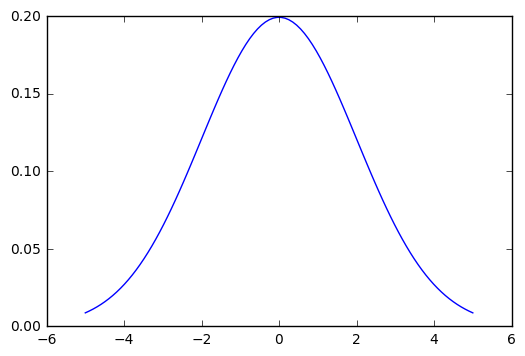

In [9]:
x = np.linspace(-5, 5, 100)
g_pdf = g.pdf(x) 
plt.plot(x, g_pdf)

Other properties of the object (mean, std, moments, ...) can be calculated as we will see later. It is also possible to draw a random sample that follows the distribution we want to use using `scipy.stats.distribution.rvs()`:
``` python
# Generate a sample of 1000 points drawn from a gaussian distrib:
g_sample = g.rvs(1000)  

# Generate a sample of 10 points drawn from a poisson distrib:
pois_sample = pois.rvf(10) 
```

See Sect. 3.2 of our reference [book](#book) for an overview of the main distributions implemented in scipy. 

(array([   5.,   22.,   64.,  128.,  226.,  252.,  183.,   84.,   28.,    8.]),
 array([-6.39118195, -5.17173199, -3.95228203, -2.73283206, -1.5133821 ,
        -0.29393214,  0.92551783,  2.14496779,  3.36441775,  4.58386772,
         5.80331768]),
 <a list of 10 Patch objects>)

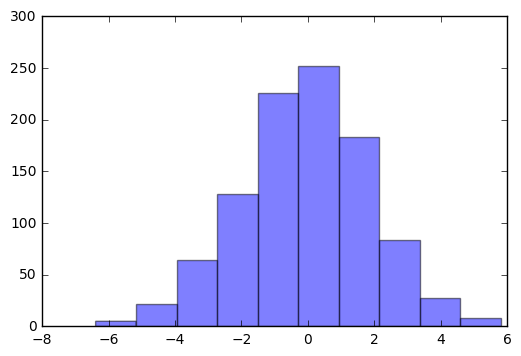

In [13]:
g_sample = g.rvs(1000)  
plt.hist(g_sample, bins=10, alpha=0.5)

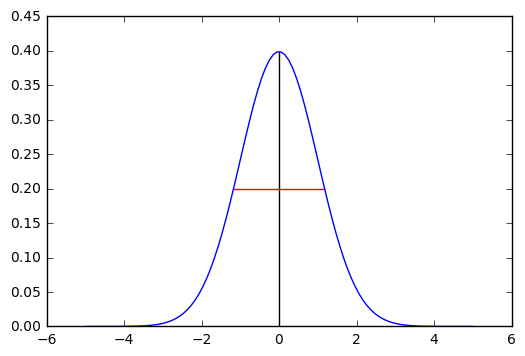

In [16]:
# Illustration of "how to use pdf within python". 
f, ax = plt.subplots(nrows=1)
n = scipy.stats.norm(0, 1)
x=np.linspace(-5,5, 100)
g_pdf = n.pdf(x)
ax.plot(x, g_pdf, lw=1, color="blue")
ax.vlines(0, 0,0.4)
ax.hlines(0.2, -np.sqrt(2*np.log(2)), np.sqrt(2*np.log(2)), color='red')

### I.4b pdf, conditional probability and Bayes rule:  <a class="anchor" id="bayes"></a>



When we have 2 *continuous random variables*, we can write: 
    
$$
p(x,y) = p(x\,|\,y) \, p(y) = p(y\,|\,x) \, p(x)
$$

Where the marginal probability $p(x)$ (resp $p(y)$) is obtained by integrating $p(x, y)$ over all the probabilities to have obtained $y$ (resp $x$): 

$$
p(x) = \int p(x,y) \, {\rm d}y 
$$
$$
p(y) = \int p(x,y) \, {\rm d}x
$$

Hence, we have: 

$$
p(x)= \int p(x\,|\,y) \, p(y)  \, {\rm d}y
$$

$$
p(y\,|\,x) = \frac{p(x\, | \, y) \, p(y)}{p(x)} = \frac{p(x\, | \, y) \, p(y)}{\int p(x\,|\,y) \, p(y)  \, {\rm d}y}  
$$

For a non continuous variable (let's say ${y_j}$ with $j=1, ..., M$), the integral becomes a sum:

$$
p(y_j\,|\,x) = \frac{p(x\, | \, y_j) \, p(y_j)}{p(x)} = \frac{p(x\, | \, y_j) \, p(y_j)}{\sum_{j=1}^M \, p(x\,|\,y_j) \, p(y_j) }  
$$

### I.5 What is a cumulative density function ? 

The CDF if basically the function $H_X(x)$ we have defined in the first place to introduce the pdf. 

The *integral of a pdf* is called **cumulative density function**. 
$$
p(X \leq x) = H(x) = \int_{-\infty}^{x}\, h(x') \, {\rm d}x'
$$

Obviously/by definition, we have that the integral of H(x) (i.e. between $-\infty$ and $+\infty$) is equal to 1.

The CDF provides a direct way to derive the *p% quantile* of a distribution, $q_p$ defined as:

$$
\frac{p}{100} = \int_{-\infty}^{q_p} h(x) dx
$$

$q_{25}$, $q_{50}$ and $q_{75}$ are commonly called the first, second and third *quartile* or 25 / 50 / 75 *percentile* of the distribution. $q_{75} - q_{25}$ is called *interquartile range* and provides a robust estimate of the width of a distribution.  

Note that *lowercase* letters are used for probability density (differential distribution) functions (pdf), and upper case for their cumulative counterpart (CDF).

**Example**:

An important CDF is the one of the gaussian distribution:

$$
P(x\,|\,\mu, \sigma) = \frac{1}{\sqrt{2\pi}\,\sigma} ~ \int_{-\infty}^{x} \exp \left( -\frac{1}{2}\frac{(x'-\mu)^2}{\sigma^2}\right) {\rm d}x'. 
$$

This function is generally evaluated in terms of what is called the *Gauss error function* :   
$$
erf(z) = \frac{2}{\sqrt{\pi}}~\int_0^z \exp(-t^2)\,{\rm{d}}t.
$$

This function can be evaluated using `scipy.special.erf()`. 

Using the error function, the CDF of a Gaussian distribution can be re-written:

$$
P(x\,|\,\mu, \sigma) = \frac{1}{2}~\left( 1 \pm erf \left( \frac{|x-\mu|}{\sqrt{2}\sigma} \right)  \right),
$$

with "+" sign if $x > \mu$, and "-" sign if $x<\mu$. 

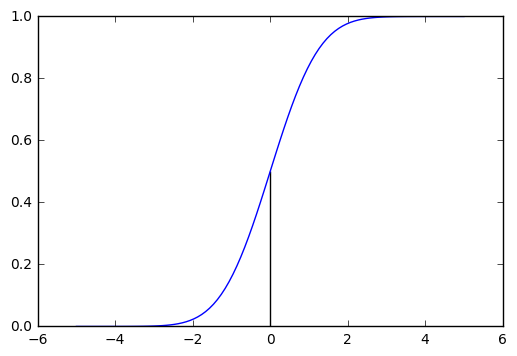

In [3]:
# CDF of a gaussian
f, ax = plt.subplots(nrows=1)
n = scipy.stats.norm(0, 1)
x=np.linspace(-5,5, 100)
g_cdf = n.cdf(x)
ax.plot(x, g_cdf, lw=1, color="blue")
ax.vlines(0, 0,0.5)

**Exercise:**

- What should be $erf(\infty)$ ? (Don't do any calculation !).
- From the above definition, it is clear that:

$$
p(a < x < b\,| \,\mu, \sigma) = P(b \, | \,\mu, \sigma) - P(a \,| \, \mu, \sigma)
$$

Derive the probability that $p(\mu - M\,\sigma < x < \mu + M \, \sigma)$ for M = 1, 2, 3.  
- What is the interquartile range $q_{75} - q_{25}$ for a Gaussian/Normal distribution of standard deviation $\sigma$  ?  (Tip: Inverse of the error function in python can be imported as `scipy.special import erfinv`)

### Intermezo:

See the Notebook Descriptive_statistics.ipynb for characteristics and properties of common distributions ... 

### I.6 Working with pdf and CDF 

In scipy.stats, there are classes for many distributions, which have methods that can very useful to study pdf! 

#### I.6.1 Create and fit specific distributions:

For example, to produce an instance of a normal distribution with "frozen" parameters (mean=2, standard deviation=2 here), you can just do:

In [14]:
#import scipy.stats
#import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline
n = scipy.stats.norm(2, 4)

You can now use this distribution in various ways. For example, to plot the pdf and cdf, you can do this:

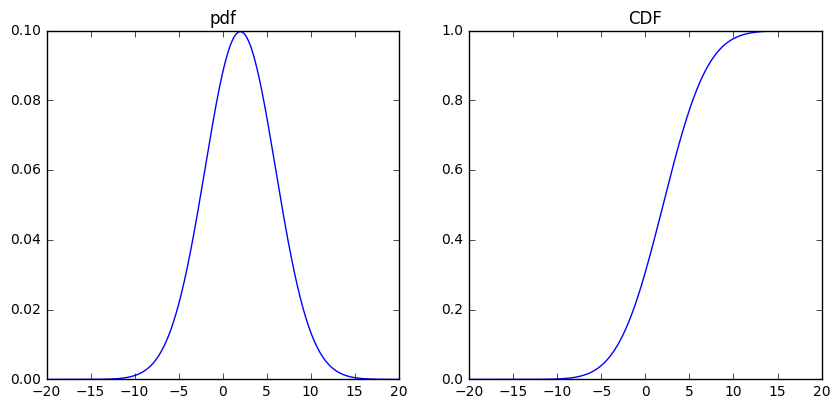

In [48]:
## define some x coordinates
x = np.linspace(-20, 20, 2000)

## make a figure
fig, (ax,ax2) = plt.subplots(1,2,figsize=(10,4.5))
ax.plot(x, n.pdf(x))
ax.set_title("pdf")

ax2.plot(x, n.cdf(x))
ax2.set_title("CDF")

# Note, this example is adapted from Daniela Huppenkothen and Fernando Perez 
# https://github.com/dhuppenkothen/ClassicalStatsPython

It is also possible with `scipy.stats` to  fit a distribution to a data sample:

The fit parameter for the mean of the distribution is: 1.9793
The fit parameter for the standard deviation of the distribution is: 4.1366


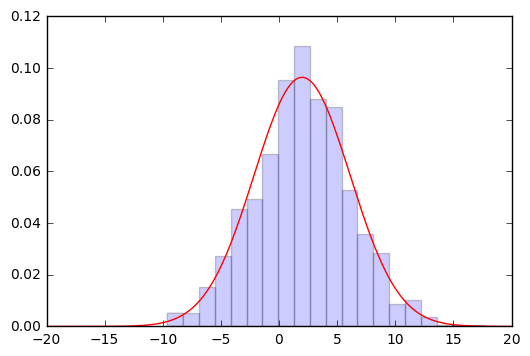

In [15]:
## now fit a normal distribution to the sample with the 
## fit method of the norm class
sample = np.random.normal( 2, 4, 1000)
fitpdf_mean, fitpdf_sigma = scipy.stats.norm.fit(sample)
plt.hist(sample, bins=20, color='blue', alpha=0.2, normed=True)
x = np.linspace(-20, 20, 200)
plt.plot(x, scipy.stats.norm.pdf(x, fitpdf_mean, fitpdf_sigma), color='red')

print("The fit parameter for the mean of the distribution is: %.4f"%fitpdf_mean)
print("The fit parameter for the standard deviation of the distribution is: %.4f"%fitpdf_sigma)

Note that fit will NOT work for discrete distributions ! 

You can also calculate the $p$ percentile of a function or "percent point function" or ppf (i.e. the inverse of the cdf): `scipy.stats.distrib.ppf(q)` 

In [16]:
n = scipy.stats.norm(0, 1)
print 'q_25 and q_75 are %.3f , %.3f' %(n.ppf(0.25), n.ppf(0.75))
print 'The interquartile range is %.3f' % (n.ppf(0.75)- n.ppf(0.25))

q_25 and q_75 are -0.674 , 0.674
The interquartile range is 1.349


You can also calculate various statistics associated to your function such as the mean, median, standard deviation, central moments, ...

In [17]:
print 'Mean = %.2f  ' %n.mean()
print 'Median = %.2f  ' %n.median()
print 'Stdev = %.2f  ' %n.std()
print 'Central moment of order 4 = %.2f' %n.moment(4)

Mean = 0.00  
Median = 0.00  
Stdev = 1.00  
Central moment of order 4 = 3.00


#### I.6.2 Generate random samples / Monte-Carlo methods: 

The distributions in `scipy.stats.distributions` each have a method called `rvs` which implements a pseudo random sample from the distribution. This is extremely useful if you want to generate "mock data" that follow a specific distribution. We have already done it when we had to add gaussian noise to generate fake data. 

Here is an example generating a mock sample drawn from a uniform distribution:

$$
p(x \, | \, \mu, W) = \frac{1}{W} ~ \mathrm{for}~|x-\mu| \leq \frac{W}{2}, ~\mathrm{and~0~otherwise}
$$

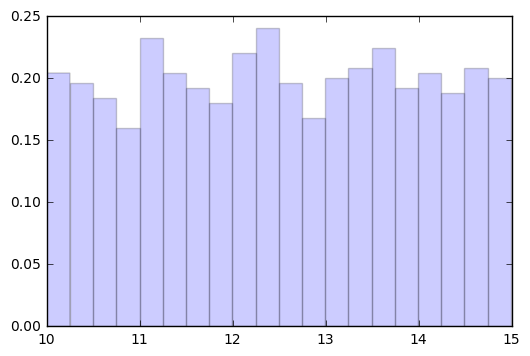

In [18]:
uni = scipy.stats.uniform(10, 5)   # First argument, i.e. 10, is the left edge, second is width
uni_sample = uni.rvs(1000)
qq = plt.hist(uni_sample, bins=20, color='blue', alpha=0.2, normed=True)

**Question:** Do you understand the values on $y$ scale ? 

#### I.6.3 Monte-Carlo methods and error estimates

##### I.6.3.1 Variable transformation

As you may know, any function of a random variable is a random variable. And in practice, we rarely measure directly measure the "primal" random variable $x$ but rather a function $y = \phi(x)$ of the latter.    

If we know the pdf $p(x)$ (where $x$ is a random variable), then it is easy to show that the probability distribution $p(y)$, where $y = \phi(x)$ (and so $x = \phi^{-1}(y)$), is:

$$
p(y) = P'(y) = p\left[ \phi^{-1} \left(y \right) \right] \left| \frac{{\rm d}\,\phi^{-1}(y) }{{\rm{d}} y} \right|
$$

where $P'(y)$ is the first derivative of the CDF.  

Let's consider the case where $x$ is drawn from a uniform distribution, but we study $y = -2.5*log(x)$. Then we have $x = \phi^{-1}(y) = 10^{-0.4*y} $. Since we have a uniform distribution for $x$, we have $p(x) = 1$ if $0 \leq x \leq 1$, and therefore $p(y) =  0.4\, \ln(10) \, 10^{-0.4\,y}$ with $0 \,< \,y \,<\,\infty $. 

Note that we take the absolute value of the first derivative. 

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in log10
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in power


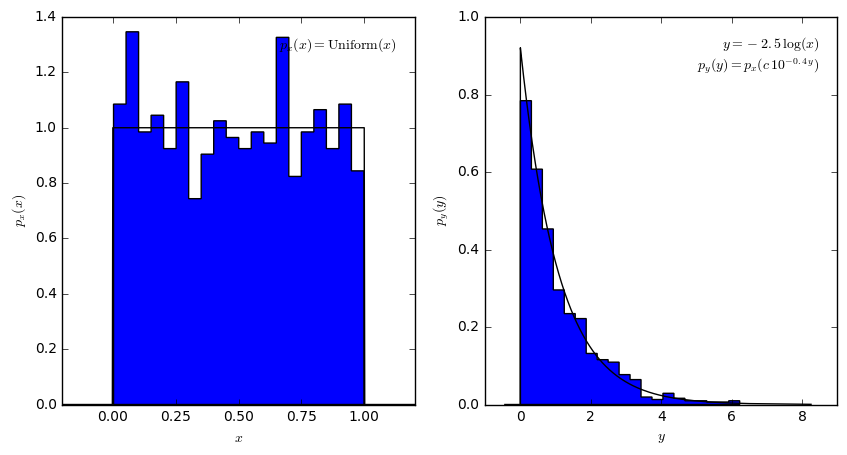

In [82]:
# create a uniform distribution
uniform_dist = scipy.stats.uniform(0.0001, 1)
x_sample = uniform_dist.rvs(1000)
# Calculate the pdf of x to overplot it
x = np.linspace(-0.5, 1.5, 1000)
Px = uniform_dist.pdf(x)

# transform the data
y_sample = -2.5*np.log10(x_sample)
# Calculate the pdf of y to overplot it
y = -2.5*np.log10(x)
Py = 0.4 * np.log(10) * Px * 10**(-0.4*y)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.hist(x_sample, 20, histtype='stepfilled', fc='blue', normed=True)
ax.plot(x, Px, '-k')
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(0, 1.4001)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.text(0.95, 0.95, r'$p_x(x) = {\rm Uniform}(x)$', va='top', ha='right', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p_x(x)$')


ax = fig.add_subplot(122)
ax.hist(y_sample, 20, histtype='stepfilled', fc='blue', normed=True)
ax.plot(y, Py, '-k')
#ax.set_xlim(0.85, 2.9)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.text(0.95, 0.95, '$y=-2.5\,\log(x)$\n$p_y(y)=p_x(c\,10^{-0.4\,y})$', va='top', ha='right', transform=ax.transAxes)
ax.set_xlabel('$y$')
ax.set_ylabel('$p_y(y)$')


**Exercise:** 

Calculate and visualise the CDF of the two (sampled) distributions above and estimate (visually) from the CDF the median of the distribution (Tip: `sample.sort()` to sort your sample). What can you say ?

##### I.6.3.2 Error estimate and Error propagation formula:

If we have a function $z = \phi(x,y)$, where $x $ and $y$ are random variable with sample values $x_i = {x_1, ..., x_n}$ and $y_i = {y_1, ..., y_n}$, then the error on $\sigma_z$ is given by the well known **Error propagation formula**:  

$$
\sigma_z^2 \, = \left( \frac{\partial \phi}{\partial x} \right)_\bar{x}^2  \sigma_x^2 \, + \left( \frac{\partial \phi}{\partial y} \right)_\bar{y}^2  \sigma_y^2  + 2  \left( \frac{\partial \phi}{\partial x} \right)_\bar{x} \left( \frac{\partial \phi}{\partial y} \right)_\bar{y} \sigma_{xy}
$$

*Demonstration:*
We can define $z_i$ as $\phi(x_i, y_i)$ (i.e. $\phi$ evaluated at $(x_i, y_i)$), and $\bar{z}$ as $\phi(\bar{x}, \bar{y})$ (i.e. $\phi$ evaluated at its mean value). 

The Taylor expansion of $z$ around its average value is:

$$
z_i = \phi(\bar{x}, \bar{y}) \, + \,  \left(\frac{\partial \phi}{\partial x} \right)_\bar{x}  \, (x_i-\bar{x})+ \, \left (\frac{\partial \phi}{\partial y} \right)_\bar{y} \, (y_i-\bar{y})  ~ + ~{\rm {higher~order~terms}}
$$

If the measured values $x_i, y_i$ are close to the average, then, neglecting the higher order terms, we have:   

$$
z_i - \bar{z} = \left(\frac{\partial \phi}{\partial x} \right)_\bar{x}  \, (x_i-\bar{x})+ \, \left (\frac{\partial \phi}{\partial y} \right)_\bar{y} \, (y_i-\bar{y})
$$

We can then calculate the variance on $\Phi$ which is:    

$$
\sigma_z^2 \, = \, \sum_i^{N} \, \frac{(z_i - \bar{z})^2}{N} 
$$

Hence,    
$$
\sigma_z^2 \, = \, \frac{1}{N} \sum_i^{N} \, (x_i-\bar{x})^2 \, \left( \frac{\partial \phi}{\partial x} \right)_\bar{x}^2  \,   +  \frac{1}{N} \sum_i^{N} \, (y_i-\bar{y})^2 \, \left (\frac{\partial \phi}{\partial y} \right)_\bar{y}^2 \,  + \frac{2}{N}  \sum_i^{N}   \, (x_i-\bar{x}) (y_i-\bar{y}) \left( \frac{\partial \phi}{\partial x} \right)_\bar{x} \left( \frac{\partial \phi}{\partial y} \right)_\bar{y} 
$$

$$
\sigma_z^2 \, = \left( \frac{\partial \phi}{\partial x} \right)_\bar{x}^2  \sigma_x^2 \, + \left( \frac{\partial \phi}{\partial y} \right)_\bar{y}^2  \sigma_y^2  + 2  \left( \frac{\partial \phi}{\partial x} \right)_\bar{x} \left( \frac{\partial \phi}{\partial y} \right)_\bar{y} \sigma_{xy}
$$

Such error estimates for non-linear functions (i.e. non linear in their variables) are biased on account of using a truncated series expansion. 

Note also that even in the simpler case where $z = \phi(x)$ (simple transformation of variable), there is no guarantee, if $x$ follows a gaussian distribution of width $\sigma_x$, that the transformed variable $z$ also follows a gaussian distribution of width $\sigma_z$. 

**Conclusions:** Although there is no explicit assumption regarding the pdf in the derivation of the "error propagation" formula, there is an implicit one which comes from neglecting higher order terms. We'll see hereafter how Monte-Carlo simulations can be used to study the distribution of a transformed variable. 

##### I.6.3.3 Monte-Carlo Error estimate:

By using Monte-Carlo simulations, we can verify the validity of the error propagation formula, but also have a way to derive the mean value and variance. Indeed, random samples allow us to approximate a pdf by drawing a virtually infinite samples from it. This means that:

$$
\int\limits_{-\infty}^{+\infty} f(x) h(x) dx \rightarrow \frac{1}{N}\sum\limits_i^N f(x_i),
$$

where $x_i$ is a random number drawn from the distribution h(x). 
If we specialize that formula for the mean, we have:

$$
\mu = \int_{-\infty}^{+\infty} x \,h(x) dx \rightarrow \frac{1}{N}\sum\limits_i^N x_i,
$$

and the variance

$$
\sigma^2 = \int_{-\infty}^{+\infty} (x - \mu)^2 \, h(x) dx \rightarrow \frac{1}{N}\sum\limits_i^N (x_i - \hat{\mu})^2
$$

It's basically as if we did our experiment nearly infinitely many times.

- Let's first apply the Monte-carlo approach to the simple case of the sum of two random variables ($a$ and $b$) drawn from a gaussian distribution, and compare the result to the Gaussian distribution we derive from std error propagation formula:

** z = a + b **

*Standard error propagation:*

$\sigma_z^2 = \left(\frac{\partial z}{\partial a}\right)^2 \sigma_a^2 + \left(\frac{\partial z}{\partial b}\right)^2 \sigma_b^2$

$\Longrightarrow \sigma_z^2 =  \sigma_a^2 + \sigma_b^2$


Standard Error: z = 8.00 +- 1.00
MC Error: z = 8.01 +- 0.99


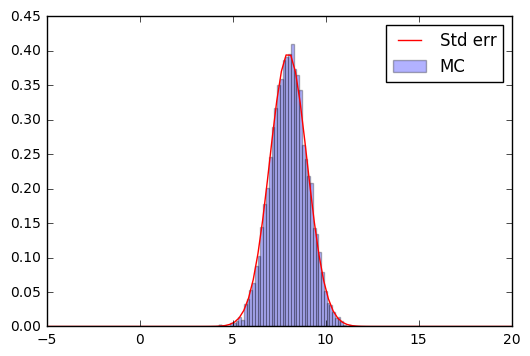

In [92]:
mu_a, sigma_a = 5., 1.
mu_b, sigma_b = 3., 0.1

a = scipy.stats.norm(mu_a, sigma_a)
b = scipy.stats.norm(mu_b, sigma_b)
sample_a = a.rvs(10000)
sample_b = b.rvs(10000)
sample_z = sample_a + sample_b

mu_z, sigma_z = (mu_a + mu_b), np.sqrt(sigma_a**2 + sigma_b**2)  # error propagation formula
z = scipy.stats.norm(mu_z, sigma_z)

z_hist = plt.hist(sample_z, bins=50, normed=True, color='blue', alpha=0.3, label='MC')
x = np.linspace(-5, 20, 100)
plt.plot(x, z.pdf(x), color='red', label='Std err')
plt.legend()

sample_mu_z = np.mean(sample_z)
sample_sig_z = np.std(sample_z)

print "Error from error propagation: z = %1.2f +- %1.2f" % (mu_z, sigma_z)
print "MC Error: z = %1.2f +- %1.2f" % (sample_mu_z, sample_sig_z)

** Exercise **

Follow the same approach (i.e. Monte-Carlo simulation) to verify that the error you do by estimating the mean of a Gaussian distribution is $stde \, = \, \sigma_\bar{x} = \, s / \sqrt{n}$, where $n$ is the number of points used to estimate the mean $\bar{x}$. 
For simplicity work with a normal distribution N(0,1).

Bonus:    
What is the distribution of the sample variance ($\sigma^2_{\bar x}$) and what is the error you do on the variance ? 

Remember: 
If the sample contains $n$ random variables:    
=> The **sample mean** is effectively distributed as a **normal distribution $N(\mu, \sigma/\sqrt{n})$**    
=> If $s^2 = \hat{\sigma}^2$ is the **sample variance**, then $(n-1)*s^2 / \sigma^2$ effectively distributed as a **chi2 distribution with $(n-1)$ degrees of freedom**.    
For a $N(\mu, \sigma)$ distribution, the error on the estimator of the variance is $\hat{\sigma}^2 \sqrt{2\,/(n-1)}$.      
The error on the sample **standard deviation** is $\hat{\sigma} / \sqrt{2(n-1)}$    

(See e.g.  http://hamelg.blogspot.be/2015/11/python-for-data-analysis-part-16.html for a formal demonstration)

* Let's now try with the product of two random variables:  **z = a * b **

Standard Error Propagation:

$\sigma_z^2 = b^2\sigma_a^2 + a^2\sigma_b^2 = z^2\left(\left(\frac{\sigma_a}{a}\right)^2 + \left(\frac{\sigma_b}{b}\right)^2\right)$


Standard Error: z = 1.00 +- 1.41
MC Error: z = 1.00 +- 1.73


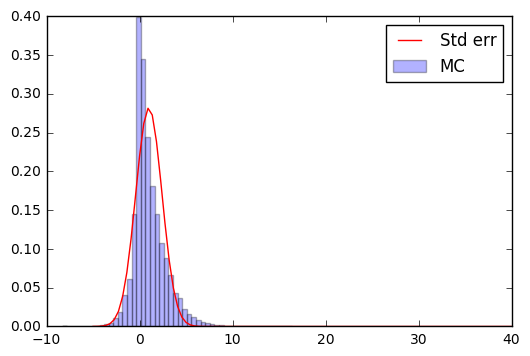

In [99]:
mu_a, sigma_a = 1., 1.
mu_b, sigma_b = 1., 1.

a = scipy.stats.norm(mu_a, sigma_a)
b = scipy.stats.norm(mu_b, sigma_b)
sample_a = a.rvs(10000)
sample_b = b.rvs(10000)
sample_z = sample_a * sample_b

mu_z = (mu_a * mu_b) 
sigma_z = mu_z * np.sqrt((sigma_a / mu_a)**2  + (sigma_b / mu_b)**2)  # error propagation formula
z = scipy.stats.norm(mu_z, sigma_z)

z_hist = plt.hist(sample_z, bins=50, normed=True, color='blue', alpha=0.3, label='MC')
x = np.linspace(-5, 40, 100)
plt.plot(x, z.pdf(x), color='red', label='Std err')
plt.legend()

sample_mu_z = np.mean(sample_z)
sample_sig_z = np.std(sample_z)

print "Error from error propagation: z = %1.2f +- %1.2f" % (mu_z, sigma_z)
print "MC Error: z = %1.2f +- %1.2f" % (sample_mu_z, sample_sig_z)

Modify the error on b in the above example, and see how the final distribution behaves. 

** Exercise: **

Examine the error on the magnitude: $z = -2.5 * log(a) $ using monte-carlo method and compare it to the results one would obtain using the error propagation formula  (**THIS is an important exercise**). Consider a normalised flux $a = 1$ and a relative error $\sigma_a = 0.2$.

Note that the `scipy.stats.distribution.rvs()` (replacing "distribution" by the name of the distribution of interest) is complemented by `np.random()` that allows one to draw samples from a gaussian distribution or in uniform interval.    

#### I.6.4 Clone arbitrary distribution using Monte-Carlo method:
    
In the case of one dimensional distribution, it is pretty easy to generate an mock sample from an arbitrary distribution. This method, also called *transformation method*, makes use of the fact that to a given pdf f(x) is associated a CDF $F(x)$. The CDF, $F(x)$ provides, for each value of $x_i$, the probability that $p(x < x_i)$, and we have $0 < p(x < x_i) < 1$. One can read the CDF the other way around (i.e. take the inverse of the CDF) to generate a random sample from a specific distribution (this is in fact the method used by `scipy.random.distribution.rvs()` to generate a data sample following a given distribution). For this purpose, one generates a uniform sample of $y$, with $0 < y < 1$, and reads on the corresponding values $x'$. 

The following figure illustrates the concept of cloning an arbitrary 1-D distribution. It implies first to construct the CDF from the observed data and then possibly build a look-up table or model the cdf analytically. 


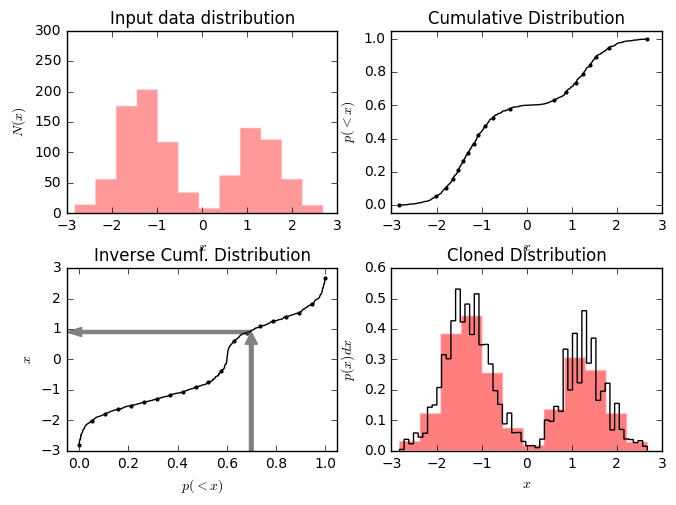

In [118]:
from astroML.plotting import hist  

# Figure 3.25 from our reference book illustrating 
# the "transformation method" to clone an arbitrary distribution. 

#------------------------------------------------------------
# Create a distribution and clone it
Ndata = 1000
Nclone = 100000
np.random.seed(0)

# generate an 'observed' bimodal distribution with 10000 values
# You might not understand the details here ... this is a bit more advances python
dists = (scipy.stats.norm(-1.3, 0.5), scipy.stats.norm(1.3, 0.5))
fracs = (0.6, 0.4)
x = np.hstack((d.rvs(f * Ndata) for d, f in zip(dists, fracs)))

# create a cumulative distribution
x.sort()
Px_cuml = np.linspace(0, 1, Ndata)

# set up an interpolation of the inverse cumulative distribution
tck = scipy.interpolate.splrep(Px_cuml, x)

# sample evenly along the cumulative distribution, and interpolate
Px_cuml_sample = np.linspace(0, 1, 10 * Ndata)
x_sample = scipy.interpolate.splev(Px_cuml_sample, tck)

# derive the cloned distribution
y_cloned = np.random.sample(Nclone)   
x_cloned = scipy.interpolate.splev(y_cloned, tck)

#------------------------------------------------------------
# Plot the cloned distribution and the procedure for obtaining it
fig = plt.figure(figsize=(7, 5))
fig.subplots_adjust(hspace=0.3, left=0.1, right=0.95,
                    bottom=0.08, top=0.92)

indices = np.linspace(0, Ndata - 1, 20).astype(int)

# plot a histogram of the input
ax = fig.add_subplot(221)
hist(x, bins='knuth', ax=ax,
     histtype='stepfilled', ec='pink', fc='red', alpha=0.4)
ax.set_ylim(0, 300)
ax.set_title('Input data distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$N(x)$')

# plot the cumulative distribution
ax = fig.add_subplot(222)
ax.scatter(x[indices], Px_cuml[indices], lw=0, c='k', s=9)
ax.plot(x, Px_cuml, '-k')
ax.set_xlim(-3, 3)
ax.set_ylim(-0.05, 1.05)
ax.set_title('Cumulative Distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(<x)$')

# plot the inverse cumulative distribution and spline fit
ax = fig.add_subplot(223)
ax.scatter(Px_cuml[indices], x[indices], lw=0, c='k', s=9)
ax.plot(Px_cuml_sample, x_sample, '-k')
ax.arrow(0.7, -3, 0, 3.5, width=0.015, fc='gray', ec='gray',
         head_width=0.05, head_length=0.4)
ax.arrow(0.7, 0.9, -0.69, 0, width=0.1, fc='gray', ec='gray',
         head_width=0.3, head_length=0.06)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-3, 3)
ax.set_title('Inverse Cuml. Distribution')
ax.set_xlabel('$p(<x)$')
ax.set_ylabel('$x$')

# plot the resulting cloned distribution
ax = fig.add_subplot(224)
hist(x, bins='knuth', ax=ax,
     histtype='stepfilled', normed=True,
     ec='pink', fc='red',
     label='input data', alpha=0.5)
hist(x_cloned, bins='knuth', ax=ax,
     histtype='step', normed=True,
     color='k', label='cloned data')
ax.set_title('Cloned Distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)dx$')
#ax.text(0.75, 0.95, "KS test:\nD = %.2f\np = %.2f" % (D, p),
#        ha='left', va='top', transform=ax.transAxes)


In case of multi-variate distribution, things can be more complicated, unless the distribution can be separated into a product of independant 1-D distributions. We refer to our reference [book](#book) (sect. 3.7, 6.3.2) for discussion about the strategies to adopt in such situations. 

## X. References and supplementary material: <a class="anchor" id="X"></a>

* **Chapter 1** (1.2), **Chapter 3 ** (3.1, 3.2) and **Chapter 4 ** (4.1 to 4.3) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

* All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/).  

* Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 2 **

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 15**, **Chapter 18.7** 

